In [ ]:

import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

import math
import matplotlib.pyplot as plt
#histograms
df = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')


Data cleaning and KNN


In [ ]:
#Data cleaning
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes': 1, 'no': 0})
df['FAVC'] = df['FAVC'].map({'yes': 1, 'no': 0})
df['CAEC'] = df['CAEC'].map({'Sometimes': 1, 'no': 0, 'Frequently': 2, 'Always': 3})
df['SMOKE'] = df['SMOKE'].map({'yes': 1, 'no': 0})
df['SCC'] = df['SCC'].map({'yes': 1, 'no': 0})
df['CALC'] = df['CALC'].map({'Sometimes': 1, 'no': 0, 'Frequently': 2, 'Always': 3})
df['MTRANS'] = df['MTRANS'].map({'Public_Transportation': 1, 'Walking': 0, 'Automobile': 2, 'Motorbike': 3, 'Bike': 4})
df['NObeyesdad'] = df['NObeyesdad'].map({'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II':5, 'Obesity_Type_III':6 })
x = df.iloc[:,0:15]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state = 0, test_size=.2)

#data scaling for KNN
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=19,algorithm='kd_tree', p=7, metric='euclidean')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred
conMatrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.74      0.92      0.82        65
           1       0.69      0.35      0.47        57
           2       0.73      0.63      0.68        57
           3       0.66      0.60      0.63        55
           4       0.77      0.76      0.77        67
           5       0.71      1.00      0.83        53
           6       0.95      1.00      0.97        69

    accuracy                           0.76       423
   macro avg       0.75      0.75      0.74       423
weighted avg       0.76      0.76      0.75       423



KNN performance evaluation is above


Feature selection


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x,y, random_state = 0, test_size=.2)
newFeatures = SelectKBest(chi2,k=4).fit_transform(X_train2,y_train2)
print(newFeatures)


[[  1.        38.148845  79.661693   1.      ]
 [  0.        40.366238 109.349025   1.      ]
 [  1.        39.648946  80.086524   1.      ]
 ...
 [  0.        21.        70.         0.      ]
 [  1.        29.32038   69.906708   1.      ]
 [  0.        24.417552 117.398976   1.      ]]




Gender, age, family history with obesity, and weight are the top 4 features that determine obesity.



K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
scaler = StandardScaler()
df[['Gender_T','Age_T','Height_T','Weight_T','family_history_with_overweight_T','FAVC_T','FCVC_T','NCP_T','CAEC_T','SMOKE_T','CH2O_T','SCC_T','FAF_T','TUE_T','CALC_T','MTRANS_T','NObeyesdad_T']] = scaler.fit_transform(df[['Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS','NObeyesdad']])
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,NCP_T,CAEC_T,SMOKE_T,CH2O_T,SCC_T,FAF_T,TUE_T,CALC_T,MTRANS_T,NObeyesdad_T
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,...,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,-1.419172,-0.421107,-1.064334
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,...,0.404153,-0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,0.521160,-0.421107,-1.064334
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,...,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,2.461491,-0.421107,-1.064334
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,...,0.404153,-0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,2.461491,-2.423261,-0.560452
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,...,-2.167023,-0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,0.521160,-0.421107,-0.056570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,...,0.404153,-0.300346,-0.145900,-0.456705,-0.218272,0.783135,0.407996,0.521160,-0.421107,1.455076
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,...,0.404153,-0.300346,-0.145900,-0.004702,-0.218272,0.389341,-0.096251,0.521160,-0.421107,1.455076
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,...,0.404153,-0.300346,-0.145900,0.075361,-0.218272,0.474971,-0.019018,0.521160,-0.421107,1.455076
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,...,0.404153,-0.300346,-0.145900,1.377801,-0.218272,0.151471,-0.117991,0.521160,-0.421107,1.455076


In [ ]:
# Find the optimal k (number of clusters) - elbow plot

def optimize_k_means(data, max_k):
  means = []
  inertias = []

  for k in range(1, max_k):
# run the kmeans algorithm multiple times, plot the inertias (sum of square distances to nearest cluster center)
#   cluster increase gives inertia decrease - gets to small change which means we have found k)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    means.append(k)
    inertias.append(kmeans.inertia_)

  #elbow plot
  fig = plt.subplots(figsize=(10,5))
  plt.plot(means, inertias, 'o-')
  plt.xlabel('Number of clusters k')
  plt.ylabel('Inertia')
  plt.grid(True)
  plt.show

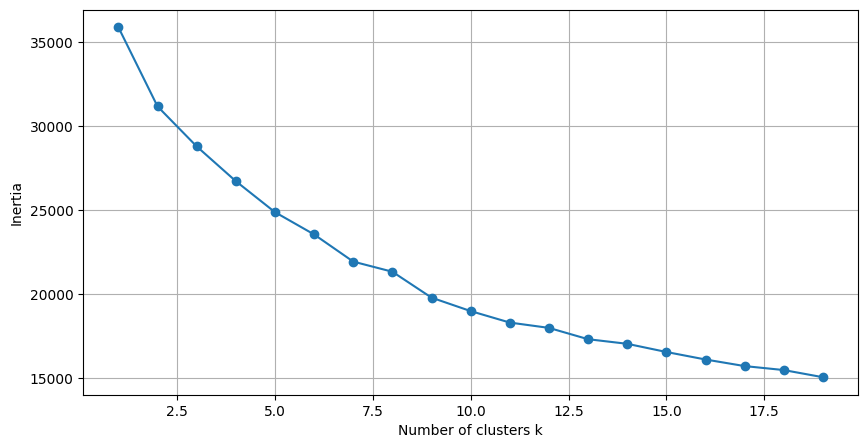

In [ ]:
optimize_k_means(df[['Gender_T','Age_T','Height_T','Weight_T','family_history_with_overweight_T','FAVC_T','FCVC_T','NCP_T','CAEC_T','SMOKE_T','CH2O_T','SCC_T','FAF_T','TUE_T','CALC_T','MTRANS_T','NObeyesdad_T']],20)

The elbow curves the most roughly at k=7, so we will use 7 clusters for testing on all variables for the dataset.

In [ ]:
# k means clustering
kmeans = KMeans(n_clusters = 7)
kmeans.fit(df[['Gender_T','Age_T','Height_T','Weight_T','family_history_with_overweight_T','FAVC_T','FCVC_T','NCP_T','CAEC_T','SMOKE_T','CH2O_T','SCC_T','FAF_T','TUE_T','CALC_T','MTRANS_T','NObeyesdad_T']]) #outputs k as well
df['kmeans_7'] = kmeans.labels_
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,CAEC_T,SMOKE_T,CH2O_T,SCC_T,FAF_T,TUE_T,CALC_T,MTRANS_T,NObeyesdad_T,kmeans_7
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,...,-0.300346,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,-1.419172,-0.421107,-1.064334,0
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,...,-0.300346,6.853997,1.618759,4.581439,2.339750,-1.080625,0.521160,-0.421107,-1.064334,6
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,...,-0.300346,-0.145900,-0.013073,-0.218272,1.163820,0.561997,2.461491,-0.421107,-1.064334,1
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,...,-0.300346,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,2.461491,-2.423261,-0.560452,3
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,...,-0.300346,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,0.521160,-0.421107,-0.056570,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,...,-0.300346,-0.145900,-0.456705,-0.218272,0.783135,0.407996,0.521160,-0.421107,1.455076,2
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,...,-0.300346,-0.145900,-0.004702,-0.218272,0.389341,-0.096251,0.521160,-0.421107,1.455076,2
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,...,-0.300346,-0.145900,0.075361,-0.218272,0.474971,-0.019018,0.521160,-0.421107,1.455076,2
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,...,-0.300346,-0.145900,1.377801,-0.218272,0.151471,-0.117991,0.521160,-0.421107,1.455076,2


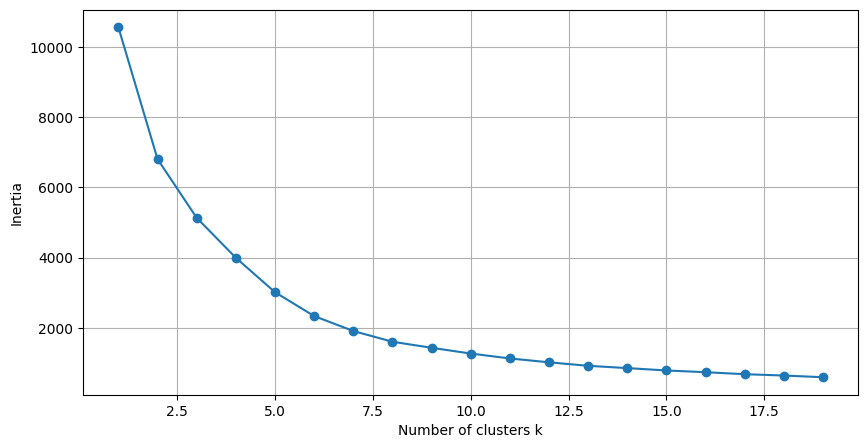

In [ ]:
optimize_k_means(df[['Gender_T','Age_T','Weight_T','family_history_with_overweight_T','NObeyesdad_T']],20)

The elbow curves on the most-significant features around k=6, so testing the most significant features should involve 6 clusters maximum.

In [ ]:
# k means clustering
kmeans = KMeans(n_clusters = 6)
kmeans.fit(df[['Gender_T','Age_T','Weight_T','family_history_with_overweight_T','NObeyesdad_T']]) #outputs k as well
df['kmeans_6'] = kmeans.labels_
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SMOKE_T,CH2O_T,SCC_T,FAF_T,TUE_T,CALC_T,MTRANS_T,NObeyesdad_T,kmeans_7,kmeans_6
0,1,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,...,-0.145900,-0.013073,-0.218272,-1.188039,0.561997,-1.419172,-0.421107,-1.064334,0,5
1,1,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,...,6.853997,1.618759,4.581439,2.339750,-1.080625,0.521160,-0.421107,-1.064334,6,5
2,0,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,...,-0.145900,-0.013073,-0.218272,1.163820,0.561997,2.461491,-0.421107,-1.064334,1,0
3,0,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,...,-0.145900,-0.013073,-0.218272,1.163820,-1.080625,2.461491,-2.423261,-0.560452,3,2
4,0,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,...,-0.145900,-0.013073,-0.218272,-1.188039,-1.080625,0.521160,-0.421107,-0.056570,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,...,-0.145900,-0.456705,-0.218272,0.783135,0.407996,0.521160,-0.421107,1.455076,2,1
2107,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,...,-0.145900,-0.004702,-0.218272,0.389341,-0.096251,0.521160,-0.421107,1.455076,2,1
2108,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,...,-0.145900,0.075361,-0.218272,0.474971,-0.019018,0.521160,-0.421107,1.455076,2,1
2109,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,...,-0.145900,1.377801,-0.218272,0.151471,-0.117991,0.521160,-0.421107,1.455076,2,1


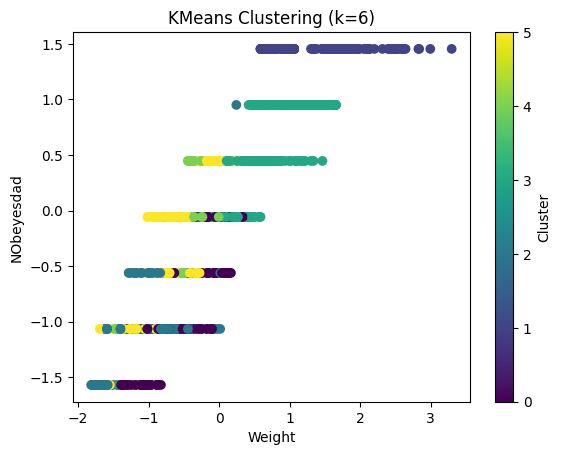

In [ ]:
plt.scatter(x=df['Weight_T'], y=df['NObeyesdad_T'], c=df['kmeans_6'], cmap='viridis')

plt.xlabel('Weight')
plt.ylabel('NObeyesdad')
plt.title('KMeans Clustering (k=6)')
plt.colorbar(label='Cluster')
plt.show()

EDA - Exploratory Data Analysis

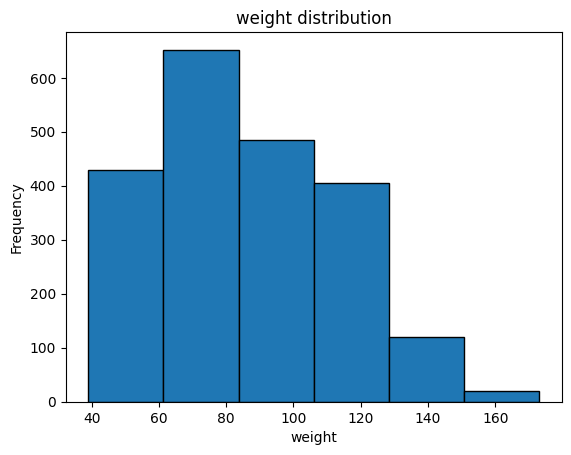

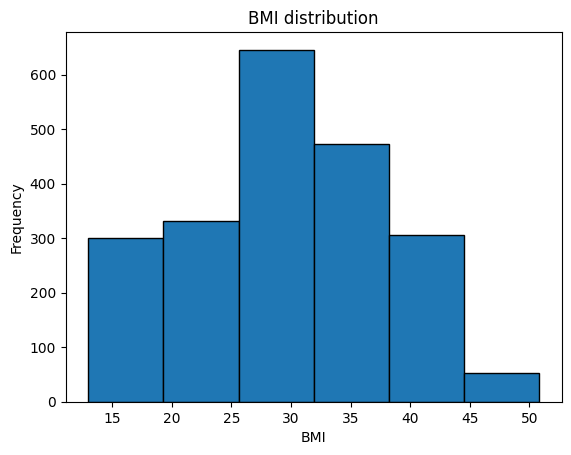

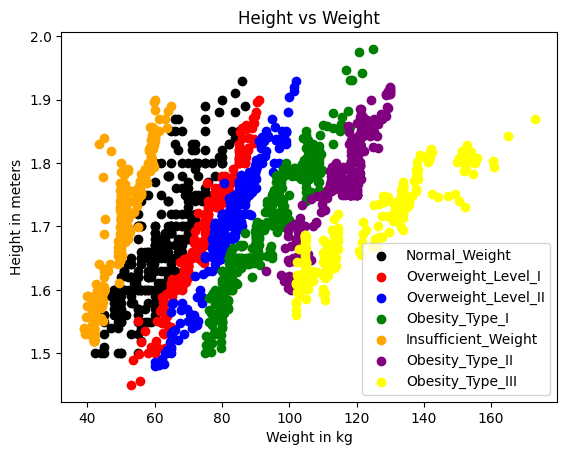

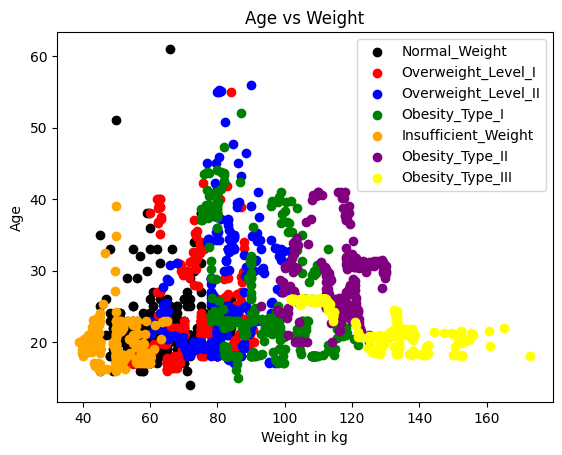

<Axes: title={'center': 'Gender vs obesity'}, xlabel='Gender'>

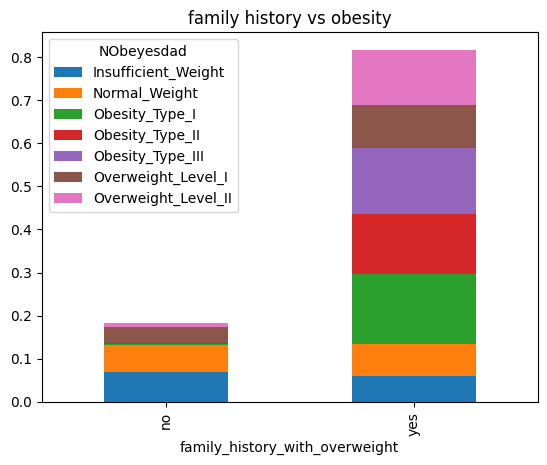

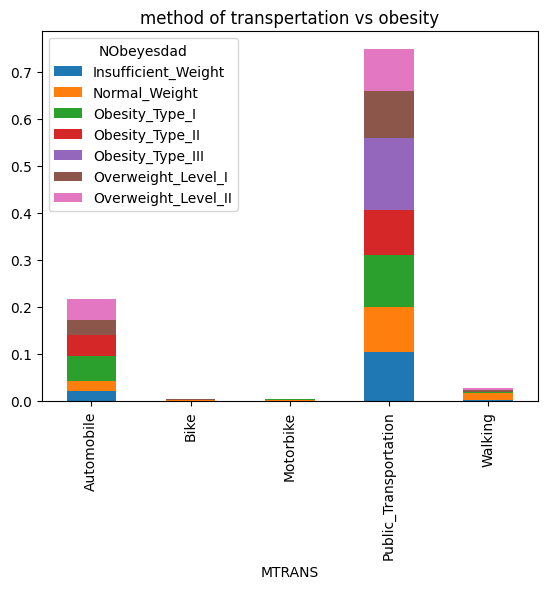

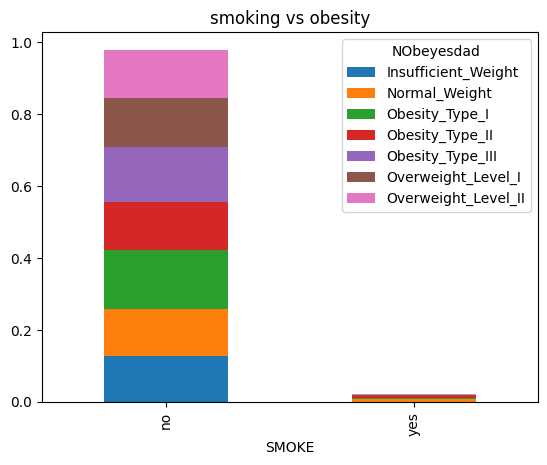

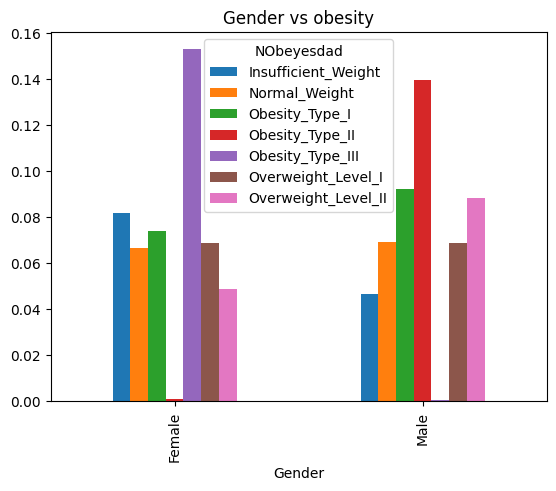

In [ ]:
#reverse cleaning
df['Gender'] = df['Gender'].map({1 : 'Female', 0 : 'Male'})
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({ 1 : 'yes', 0 : 'no'})
df['FAVC'] = df['FAVC'].map({1 : 'yes', 0 : 'no'})
df['CAEC'] = df['CAEC'].map({1 : 'Sometimes', 0 : 'no', 2 : 'Frequently', 3 : 'Always'})
df['SMOKE'] = df['SMOKE'].map({1 : 'yes', 0 : 'no'})
df['SCC'] = df['SCC'].map({1 : 'yes', 0 : 'no'})
df['CALC'] = df['CALC'].map({1 : 'Sometimes', 0 : 'no', 2 : 'Frequently', 'Always' : 3})
df['MTRANS'] = df['MTRANS'].map({1 : 'Public_Transportation', 0 : 'Walking', 2 : 'Automobile', 3 : 'Motorbike', 4 : 'Bike'})
df['NObeyesdad'] = df['NObeyesdad'].map({0 : 'Insufficient_Weight', 1 : 'Normal_Weight', 2 : 'Overweight_Level_I', 3 : 'Overweight_Level_II', 4 : 'Obesity_Type_I', 5 : 'Obesity_Type_II', 6 : 'Obesity_Type_III' })
x = df.iloc[:,0:15]

#display total weight distribution
df['Weight'].plot(kind='hist', bins=6, edgecolor='black')
plt.xlabel('weight')
plt.ylabel('Frequency')
plt.title('weight distribution')
plt.show()

#Bmi distribution
df2 = df
df2['BMI'] = df2['Weight'] / (df2['Height'] * df2['Height'])
#display distribution of BMI
df2['BMI'].plot(kind='hist', bins=6, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI distribution')
plt.show()

#scatter charts
#different weight classes and colors
weight_class = df['NObeyesdad'].unique()
colors = ['black', 'red', 'blue', 'green', 'orange', 'purple', 'yellow']

for i, class_type in enumerate(weight_class):
    plt.scatter(df[df['NObeyesdad'] == class_type]['Weight'], df[df['NObeyesdad'] == class_type]['Height'], c=colors[i], label=class_type)

plt.xlabel('Weight in kg')
plt.ylabel('Height in meters')
plt.title('Height vs Weight')
plt.legend()
plt.show()

#same but with age instead of height
for i, class_type in enumerate(weight_class):
    plt.scatter(df[df['NObeyesdad'] == class_type]['Weight'], df[df['NObeyesdad'] == class_type]['Age'], c=colors[i], label=class_type)

plt.xlabel('Weight in kg')
plt.ylabel('Age')
plt.title('Age vs Weight')
plt.legend()
plt.show()

#bar charts

cross_tab = pd.crosstab(df2['family_history_with_overweight'], df2['NObeyesdad'], normalize=True)
cross_tab.plot.bar(stacked=True,title ="family history vs obesity")

cross_tab = pd.crosstab(df2['MTRANS'], df2['NObeyesdad'], normalize=True)
cross_tab.plot.bar(stacked=True,title ="method of transpertation vs obesity")

cross_tab = pd.crosstab(df2['SMOKE'], df2['NObeyesdad'], normalize=True)
cross_tab.plot.bar(stacked=True,title ="smoking vs obesity")

cross_tab = pd.crosstab(df2['Gender'], df2['NObeyesdad'], normalize=True)
cross_tab.plot.bar(stacked=False,title ="Gender vs obesity")